In [ ]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import matplotlib.font_manager as fm
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np

In [20]:
df = pd.read_csv('C:/Users/rpaqh/OneDrive/Desktop/5-1/컨퍼런스/github/Project_ThematicInvest/Model/theme_vectors_xnorm.csv', 
                 index_col=0, engine='python', encoding='utf-8')#error_bad_lines=False)
df.head(5)

,themes,vectors
0,2차전지,"[-7096.778220521286, 12871.226797353534, 2587...."
1,3D프린터,"[10903.843000196677, 18503.521148866625, -3156..."
2,4대강,"[-8006.077763321286, 7393.415823798161, -24043..."
3,5G,"[-4483.314872191055, 15860.959652718622, 10811..."
4,AR,"[4912.215373729239, 17996.481813186198, 649.44..."


In [30]:
#데이터 input에 맞게 정리
theme_list = df.themes.tolist()
feature = df['vectors'].tolist()


vector_list = []
for i in range(len(feature)):
    k = feature[i].replace(',', '').replace('[','').replace(']','').split()
    vector_list.append(k)

In [31]:
vector_list

[['-7096.778220521286',
  '12871.226797353534',
  '2587.4925846250844',
  '22770.619435406265',
  '7392.495108507554',
  '7289.06245861575',
  '-12656.502486267418',
  '46858.85998840863',
  '-15898.072224267837',
  '-5348.996648936474',
  '-24912.81180452765',
  '-15849.579805496614',
  '638.4388288680348',
  '1271.7963148744311',
  '-8778.728503191727',
  '6573.567964833375',
  '-3820.1007807536917',
  '-5487.788011516153',
  '-1754.5394061827974',
  '-4508.189502642199',
  '-21292.923209982488',
  '-13810.792316193838',
  '30407.589533874096',
  '-591.6609743514855',
  '6295.2783729242055',
  '-10307.35802853803',
  '-428.4251636387198',
  '14174.178712695604',
  '-13250.018405310562',
  '-13500.899776879873',
  '-672.3800002050557',
  '16016.430941925733',
  '3858.665713507289',
  '-23164.813630205215',
  '40405.810000801604',
  '-21275.768513090006',
  '-9551.05741883762',
  '-4983.4236090195045',
  '13162.320200764778',
  '-535.9830649517826',
  '-13591.55852981651',
  '-15713.42

In [32]:
#차원축소 T-SNE
model = TSNE(learning_rate=100)
transformed = model.fit_transform(vector_list)
xs = transformed[:,0]
ys = transformed[:,1]

In [186]:
#2차원 + 이름 띄우는 함수
def plot_2d_graph(vocabs, xs, ys, cc=[1]):
    fig= plt.figure(figsize=(15,15))
    ax = fig.add_subplot(1,1,1)
    if len(cc) ==1:
        plt.scatter(xs,ys,marker = 'o', c= 'indianred',s=150,cmap='viridis', edgecolor = 'black', alpha=0.7, linewidths=2)
    else:
        plt.scatter(xs,ys,marker = 'o',c=cc, s=150,cmap='viridis', edgecolor = 'black', alpha=0.7, linewidths=2)
    for i, v in enumerate(vocabs):
        plt.annotate(v, xy=(xs[i]+0.2, ys[i]-0.13))

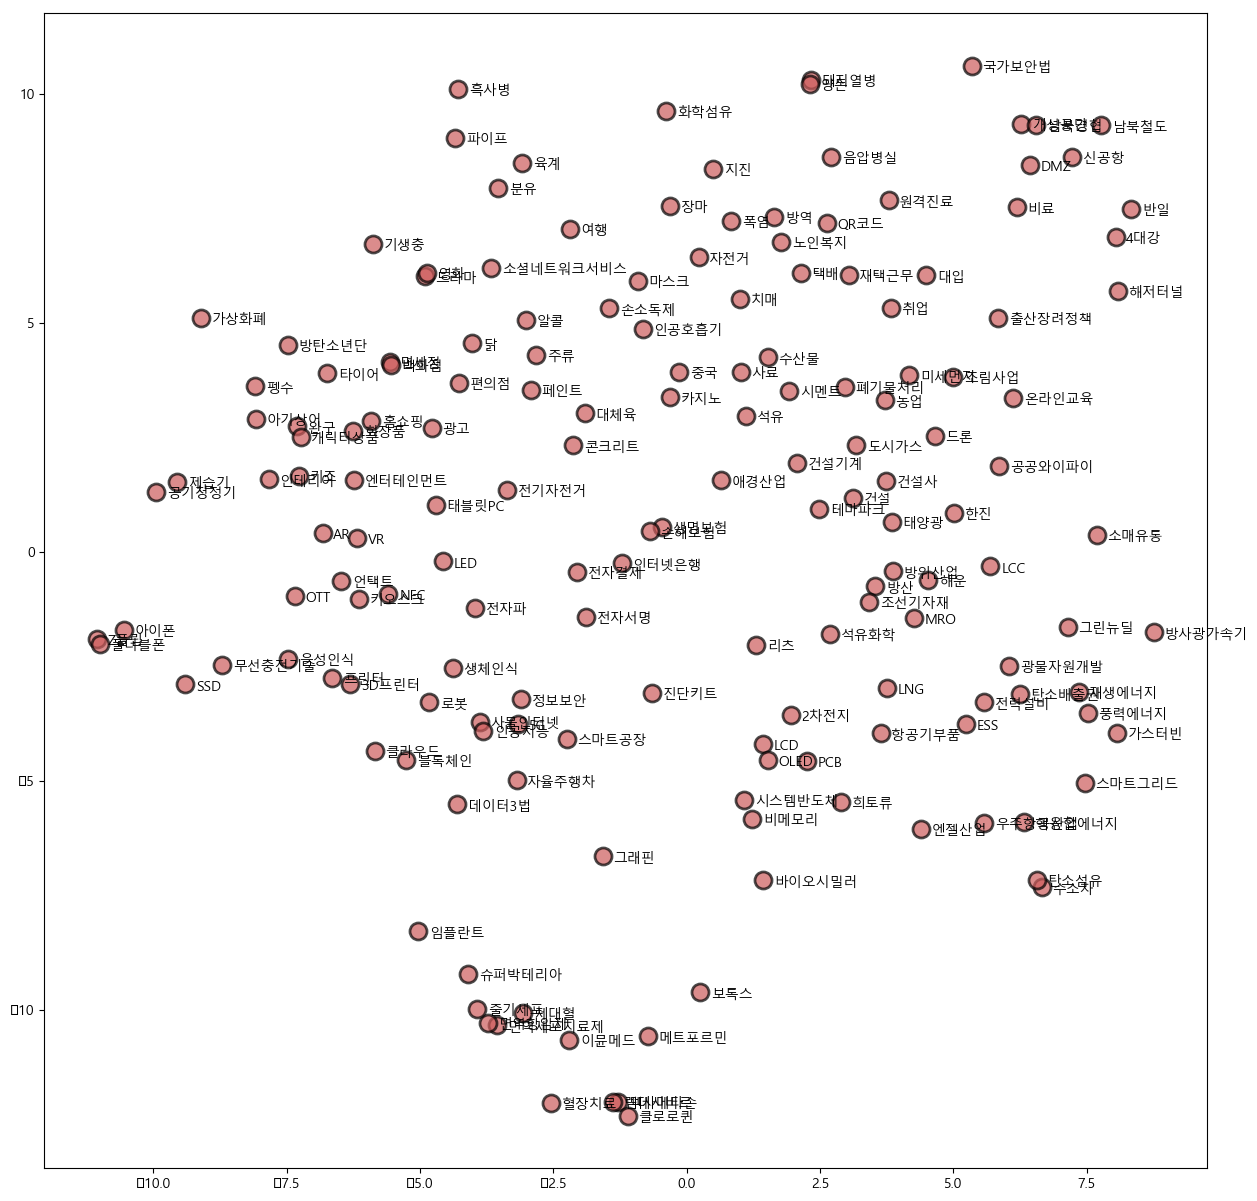

In [187]:
#plot
plt.rcParams['font.family'] = 'Malgun Gothic'
plot_2d_graph(theme_list,xs,ys)
plt.show()

In [147]:
#clustering
data = np.vstack((xs,ys)).T
kmeans = KMeans(n_clusters=13).fit(data)
label = kmeans.labels_

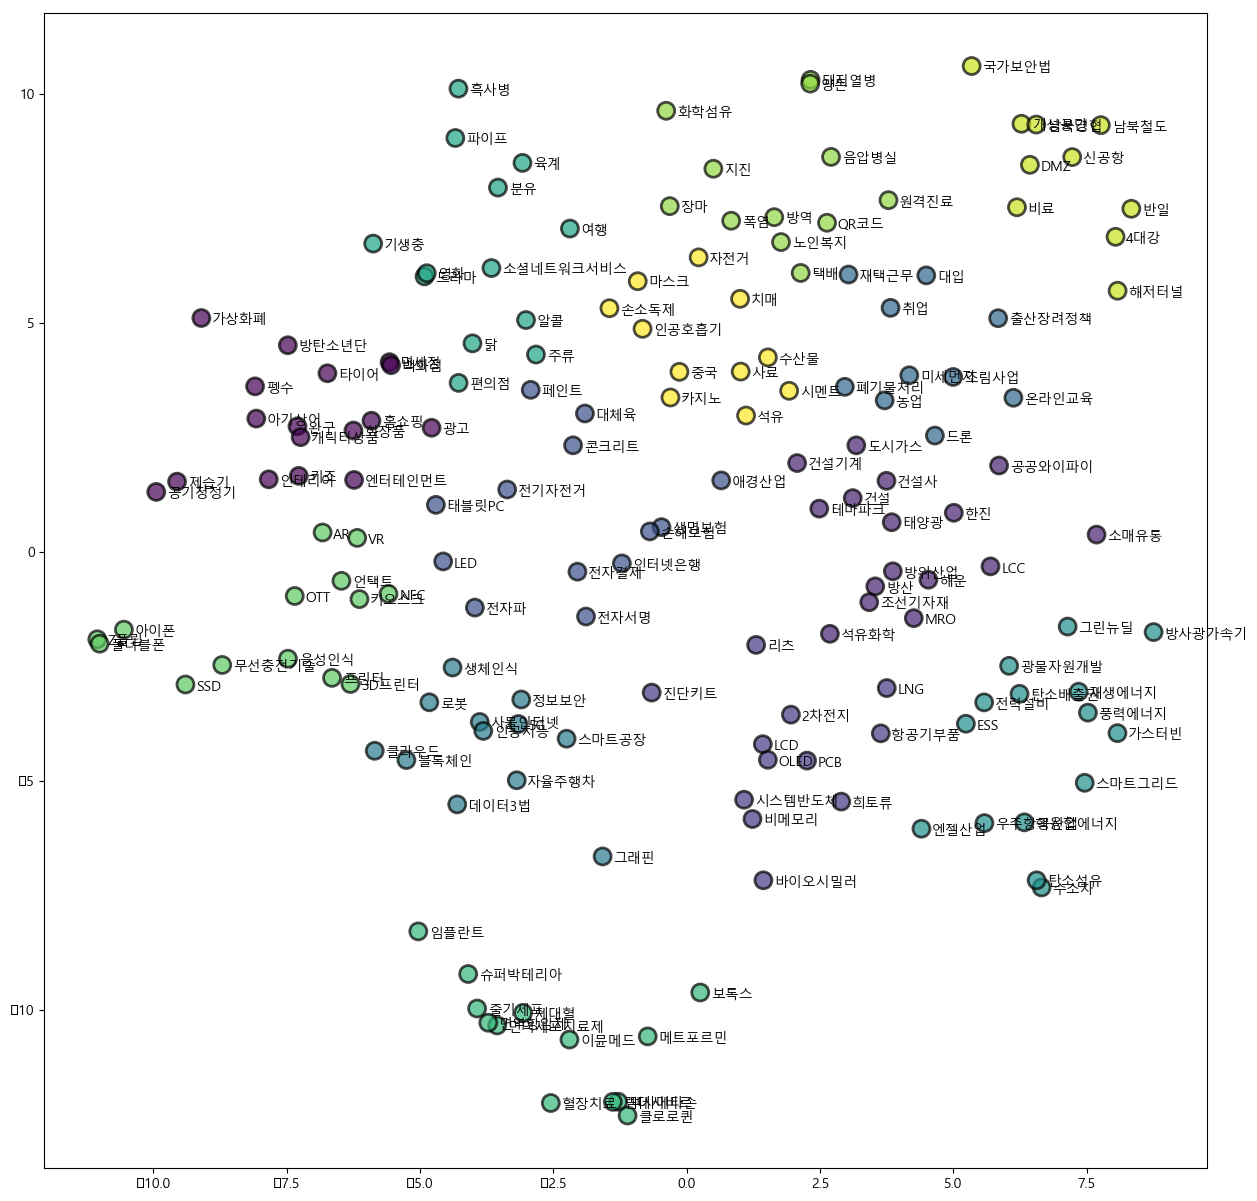

In [175]:
#clustering plot
plt.rcParams['font.family'] = 'Malgun Gothic'
plot_2d_graph(theme_list,xs,ys, label)
#plt.savefig('cluster,png')
plt.show()